#### Importing libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from matplotlib import figure
plt.rcParams['figure.figsize'] = 25,10
%matplotlib inline

θ0=3 
θ1=4

### Generating data and plotting it

In [20]:
X = 3 * np.random.rand(300,1)
y = 3 + 4 * X + np.random.randn(300,1)
y.ndim


2

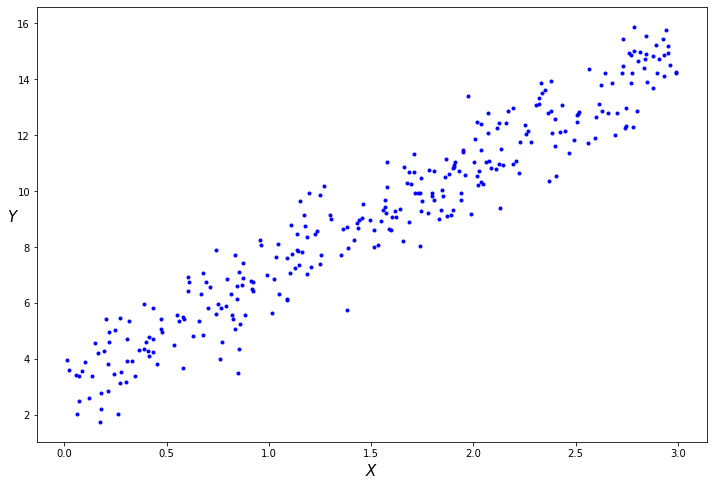

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(X,y, 'b.')
plt.xlabel('$X$', fontsize = 15)
plt.ylabel('$Y$', fontsize = 15, rotation = 0)
plt.show()



**Cost Function & Gradients**


The equation for calculating cost function and gradients are as shown below. 
Cost$$
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta,x)^{(i)} - y^{(i)})^2 
$$
Where 
$$ h(\theta,x) = \sum_{j=0}^{d}x_j\theta_j = \theta_0+\sum_{j=1}^{d}x_j\theta_j = X.\theta$$ and  $$ x_0 =1$$
Gradient
$$
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta,x) - y^{(i)}).X_j^{(i)}
$$

$$
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta,x) - y^{(i)}).X_j^{(i)})
$$
$$
\theta_j: = \theta_j -\alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$


In [22]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

### For Gradient Descent

In [30]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1), where j is the number of dimension 
    learning_rate 
    iterations = number of  of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)

    theta_history = np.zeros((iterations,2))

    for it in range(iterations):
        
        prediction = np.dot(X,theta)   # predicted value 

        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))

        theta_history[it,:] =theta.T

        cost_history[it]  = cal_cost(theta,X,y)
        
        
    return theta, cost_history, theta_history

In [31]:
lr =0.01        ##### learning rate
n_iter = 1000   ##### Number of iterations

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]  # where x0 = 1 [1, x_value]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

In [32]:
theta

array([[3.00252011],
       [3.97598988]])

In [33]:
cost_history.ndim

1

In [34]:

print('Theta is',theta)
print('Cost is',cost_history)
print('Theta is',theta_history)



Theta is [[3.00252011]
 [3.97598988]]
Cost is [2025204.4146623  1872731.68349948 1731966.11543324 1602008.80272982
 1482029.85825962 1371263.11590557 1269001.23788872 1174591.19776678
 1087430.1102605  1006961.38127738  932671.15354719  864085.02517129
  800765.02013085  742306.79140766  688337.03885711  638511.12534393
  592510.87591754  550042.54597287  510834.94542125  474637.70689271
  441219.68691043  410367.48982737  381884.10509919  355587.64919102
  331310.20408412  308896.74496518  288204.1502506   269100.28762379
  251463.17024909  235180.17777382  220147.33714406  206268.65864124
  193455.52289973  181626.11499092  170704.90195981  160622.15047789
  151313.4815318   142719.45930439  134785.21162247  127460.07954775
  120697.29387303  114453.67645804  108689.36449738  103367.55596007
   98454.27457484   93918.15286055   89730.23181616   85863.77599096
   82294.10275428   78998.42467438   75955.70399982   73146.51831421
   70552.9365064    68158.40426389   65947.63835853   639

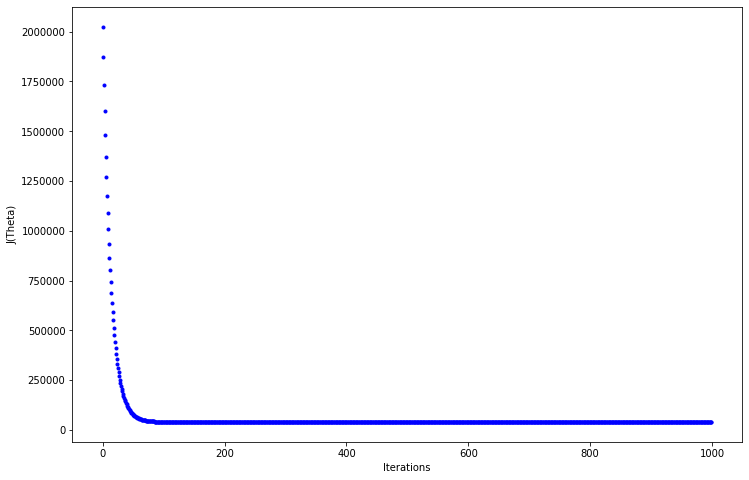

In [35]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

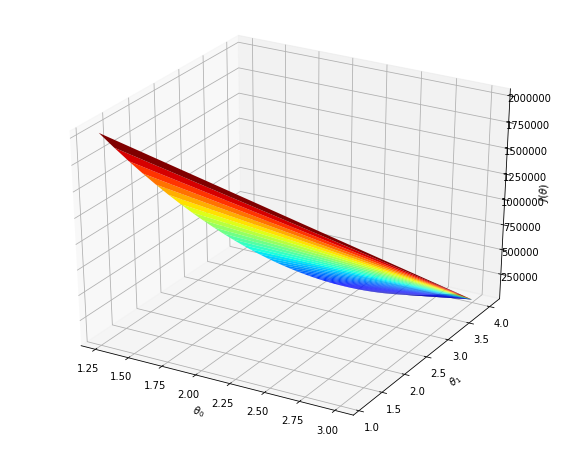

In [36]:
theta_0 = theta_history[:,0]
theta_1 = theta_history[:,1]
Z = cost_history

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(theta_0, theta_1, Z, cmap=plt.cm.jet, linewidth=0.01)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta)$')
plt.show()

### For Stochastic Gradient Discent

In [49]:
def sdg_optimizer(X,y,theta,learning_rate=0.00001,iterations=1000):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)  # updating one sample at a time
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [70]:
lr =0.00001        ##### learning rate
n_iter = 1000   ##### Number of iterations

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]  # where x0 = 1 [1, x_value]
theta,cost_history = sdg_optimizer(X_b,y,theta,lr,n_iter)

In [71]:
print(theta)
print(cost_history)
print(n_iter)

[[2.70728681]
 [4.13118545]]
[17905.43025926 16467.83513011 17840.23494748 16515.42229324
 15672.36863088 14881.17512435 15006.16295608 14925.63660571
 14737.49326664 14039.50333492 14442.34050461 13155.2613095
 13691.89739426 13451.61124675 12520.28956897 12167.57358048
 11956.90373246 10840.4473662  12142.65415071 11939.45913555
 10872.09278008 10916.15126366 10107.70029425 10109.61032473
 10018.7193423  10100.44447294  9322.83422164  9572.55636528
  8756.95696891  8519.7725351   8960.74021148  9070.61509492
  8649.65140001  8625.59473388  7751.6292185   7699.76147891
  7815.35384894  7216.20251765  7472.3985429   7404.08323989
  7072.8349059   6528.06722685  6668.44196056  6454.44688334
  6319.16876903  6122.04833038  5817.12021428  5810.33597412
  6082.43032964  5626.29333131  5221.70024146  5676.673999
  5515.44192679  5522.10290264  4868.44327396  4722.5877565
  5177.17120923  4836.03958562  4473.27121344  4146.22486359
  4091.6007715   4208.50926819  4282.68723456  4363.30442494

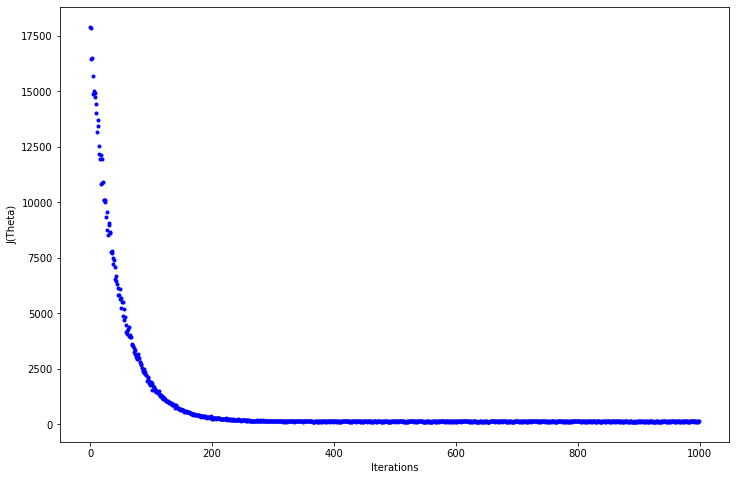

In [72]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

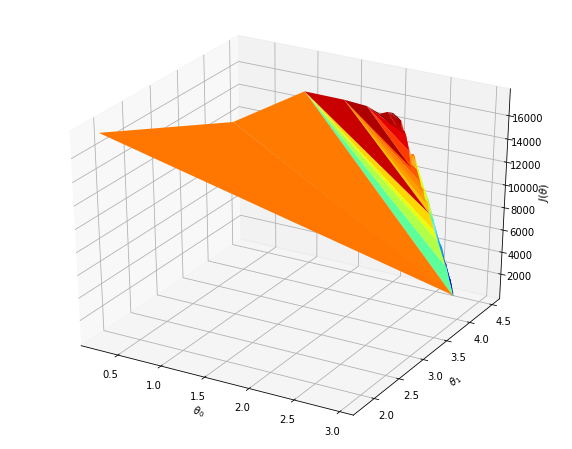

In [73]:
theta_0 = theta_history[:,0]
theta_1 = theta_history[:,1]
Z = cost_history

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(theta_0, theta_1, Z, cmap=plt.cm.jet, linewidth=0.01)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta)$')
plt.show()

### For Mini Batch Gradient Descent

In [55]:
def minibatch_sdg(X,y,theta,learning_rate=0.01,iterations=100,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i] 
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/batch_size)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        theta_history[it,:] = theta.T
        cost_history[it]  = cost
        
    return theta, cost_history, theta_history

In [56]:
lr =0.01        ##### learning rate
n_iter = 100   ##### Number of iterations
batch_size = 20
theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]  # where x0 = 1 [1, x_value]
theta,cost_history,theta_history = minibatch_sdg(X,y,theta,lr,n_iter,batch_size)


In [57]:
print('Theta is',theta)
print('Cost_history is',cost_history)
print('Theta_history is', theta_history)

Theta is [[2.95160862]
 [3.99959822]]
Cost_history is [229149.81561548  71676.30281522  24169.98374868   9813.55580973
   5408.9796014    4036.1045061    3596.4536172    3433.90716935
   3361.73459457   3310.50963808   3269.79001276   3229.98409308
   3196.32711255   3167.79708649   3135.34985553   3103.69654606
   3075.97090312   3049.17922049   3027.99919119   3002.83107145
   2979.32328608   2961.01018831   2938.64464582   2923.21992882
   2905.04833286   2888.79844102   2869.10129941   2859.28013774
   2845.22052293   2831.6046034    2814.54530033   2803.12215849
   2794.2240027    2784.52384177   2773.00486685   2764.34969573
   2756.16601886   2745.59361929   2735.49341664   2730.52216191
   2726.25948343   2717.79719584   2710.54609652   2705.09606151
   2698.28690776   2689.27073037   2687.52508883   2679.88361489
   2677.38229685   2673.70435469   2668.21768143   2665.46416362
   2661.73298782   2659.62158683   2655.1494084    2651.27576684
   2648.37658994   2645.02517874   2

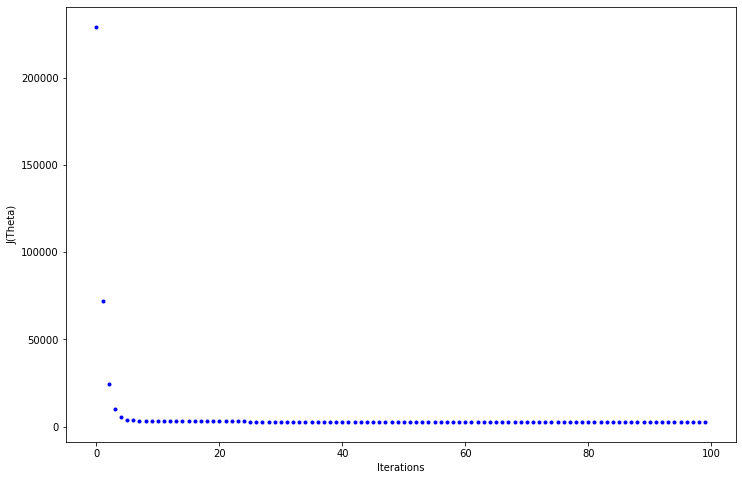

In [58]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

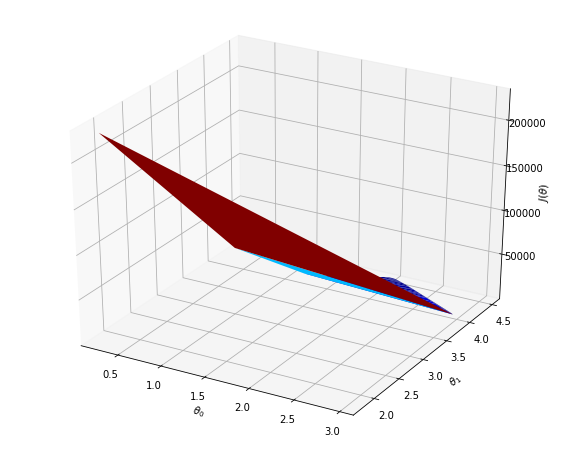

In [59]:
theta_0 = theta_history[:,0]
theta_1 = theta_history[:,1]
Z = cost_history

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection='3d')
ax.plot_trisurf(theta_0, theta_1, Z, cmap=plt.cm.jet, linewidth=0.01)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta)$')
plt.show()